Can we, by analyzing user behavior over the first n days, predict whether he will successfully complete the course to the end or drop off, and whether he will score the right number of points?

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('data/post_processing_data.csv')

In [20]:
data.head()

,user_id,last_timestamp,gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day_date,graduated
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19234 entries, 0 to 19233
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          19234 non-null  int64  
 1   last_timestamp   19234 non-null  int64  
 2   gone_user        19234 non-null  bool   
 3   correct          19234 non-null  float64
 4   wrong            19234 non-null  float64
 5   discovered       19234 non-null  int64  
 6   passed           19234 non-null  int64  
 7   started_attempt  19234 non-null  int64  
 8   viewed           19234 non-null  int64  
 9   day_date         19234 non-null  int64  
 10  graduated        19234 non-null  bool   
dtypes: bool(2), float64(2), int64(7)
memory usage: 1.4 MB


In [22]:
data.describe()

,user_id,last_timestamp,correct,wrong,discovered,passed,started_attempt,viewed,day_date
count,19234.000000,1.923400e+04,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000
mean,13363.573672,1.484763e+09,11.578715,14.890246,35.847718,33.811532,16.119736,95.187169,6.088489
std,7750.057260,3.067006e+07,22.028195,40.641154,56.576201,54.932368,31.249011,346.323327,12.341683
min,1.000000,1.434344e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6636.500000,1.456749e+09,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,13358.000000,1.488534e+09,1.000000,0.000000,9.000000,8.000000,2.000000,12.000000,1.000000
75%,20073.750000,1.513462e+09,10.000000,10.000000,42.000000,39.000000,15.000000,89.000000,6.000000
max,26798.000000,1.526773e+09,421.000000,1001.000000,198.000000,198.000000,721.000000,32778.000000,478.000000


Is it true that the course will be successfully completed?

In [23]:
import matplotlib.pyplot as plt

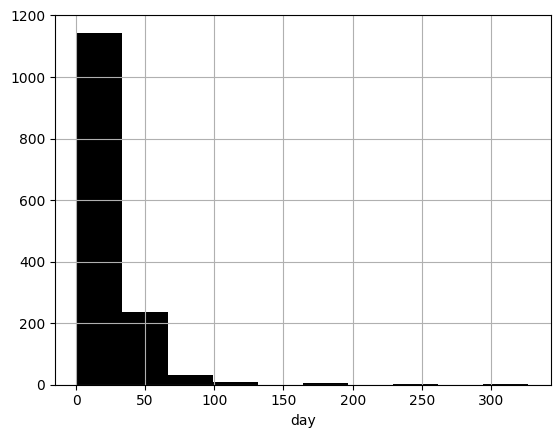

In [24]:
data[data.graduated].day_date.hist(color='black', grid=True)
plt.xlabel('day');

In [25]:
event_data = pd.read_csv('data/event_data_train.csv')

In [26]:
event_data['date'] = pd.to_datetime(event_data['timestamp'], unit='s')

In [27]:
event_data['day'] = pd.to_datetime(event_data['date']).dt.date

In [28]:
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [29]:
min_time_user = event_data.groupby('user_id', as_index=False).agg({'timestamp' : 'min'}).rename({'timestamp' : 'min_timestamp'}, axis=1)

In [30]:
min_time_user.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [31]:
data = data.merge(min_time_user, how='outer')

In [32]:
event_data_train = pd.DataFrame()

In [34]:
3*24*60*60 #for 3 days (sec)

259200

In [33]:
event_data['user_time'] = event_data.user_id.map(str) + '_' + event_data.timestamp.map(str)

In [38]:
user_last_time = min_time_user.user_id.map(str) + '_' + (min_time_user.min_timestamp + 259200).map(str)

In [39]:
user_last_time.head()

0    1_1473086664
1    2_1514642564
2    3_1434617676
3    5_1466416009
4    7_1521893860
dtype: object

In [40]:
min_time_user['user_last_time'] = user_last_time

In [41]:
min_time_user.head()

,user_id,min_timestamp,user_last_time
0,1,1472827464,1_1473086664
1,2,1514383364,2_1514642564
2,3,1434358476,3_1434617676
3,5,1466156809,5_1466416009
4,7,1521634660,7_1521893860


In [42]:
event_data = event_data.merge(min_time_user[['user_id', 'user_last_time']], how='outer')

In [45]:
event_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_last_time
0,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
1,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
2,32815,1514383364,discovered,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
3,32815,1514383364,viewed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
4,32815,1514383364,passed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564


In [46]:
event_data_train = event_data[event_data.user_time <= event_data.user_last_time]

In [51]:
print(event_data_train.shape)
event_data_train.head()

(1014985, 8)


,step_id,timestamp,action,user_id,date,day,user_time,user_last_time
0,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
1,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
2,32815,1514383364,discovered,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
3,32815,1514383364,viewed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
4,32815,1514383364,passed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564


In [52]:
submissions_data = pd.read_csv('data/submissions_data_train.csv')

In [53]:
submissions_data.mode() 

,step_id,timestamp,submission_status,user_id
0,31978,1491590313,wrong,12265
